In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import show

In [96]:
import scipy as sp

In [2]:
df = pd.read_csv('simulated_restaurant_data.csv')

In [3]:
durations = df['leaving_time'] - df['enter_time']

/Users/fanggot/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


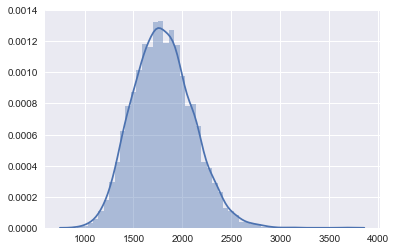

In [4]:
sns.distplot(durations)

In [5]:
from sklearn.neighbors.kde import KernelDensity

In [107]:
kde = KernelDensity(kernel='gaussian', bandwidth=60).fit(durations.values.reshape(-1,1))

In [108]:
kde.get_params()

{'algorithm': 'auto',
 'atol': 0,
 'bandwidth': 60,
 'breadth_first': True,
 'kernel': 'gaussian',
 'leaf_size': 40,
 'metric': 'euclidean',
 'metric_params': None,
 'rtol': 0}

In [109]:
kde.score_samples([[2000]])

array([-6.93376196])

In [110]:
durations.values.reshape(-1,1)

array([[2148.80180717],
       [1810.88038516],
       [1853.52500796],
       ...,
       [1967.53642654],
       [1728.279495  ],
       [2324.33757877]])

In [111]:
s = np.linspace(np.min(durations), np.max(durations))

In [112]:
(np.max(durations)- np.min(durations))/60

46.09984399477641

In [113]:
rv = sp.stats.gamma(36, loc = 0., scale = 50.)

In [114]:
rv.pdf([[2000], [2001]])

array([[0.00097077],
       [0.00096835]])

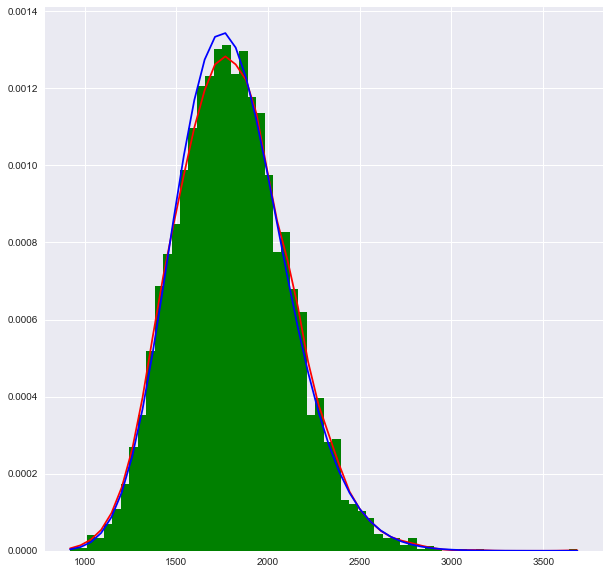

In [115]:
fig, ax = plt.subplots(figsize = (10,10))
ax.hist(durations, weights=np.ones_like(durations)/len(durations)/((np.max(durations)- np.min(durations))/60) , bins=60, color='g')
log_pdf = kde.score_samples(s.reshape(-1,1))
ax.plot(s, np.exp(log_pdf), color='r')
ax.plot(s, rv.pdf(s), color='b')
show()

In [116]:
num_table = 4

In [120]:
(1-rv.cdf(2600))/(1-rv.cdf(2000))

0.03344323626056851

In [144]:
def sf_after_t(rv, t_0, t_1):
    return rv.sf(t_1)/rv.sf(t_0)

In [145]:
sf_after_t(rv, 2000, 2600)

0.03344323626056838

In [146]:
sf_after_t(rv, 2000, 2000)

1.0

In [217]:
x_axis = np.arange(0,1000,0.1)
y_axis_1 = np.array([sf_after_t(rv,1000,1000+i) for i in x_axis])
y_axis_2 = np.array([i**2 for i in y_axis_1])
y_axis_3 = np.array([i**3 for i in y_axis_1])
y_axis_4 = np.array([i**4 for i in y_axis_1])
y_axis_5 = np.array([i**5 for i in y_axis_1])
y_axis_6 = np.array([sf_after_t(rv,2000,2000+i) for i in x_axis])

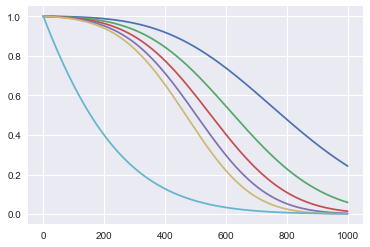

In [218]:
plt.plot(x_axis, y_axis_1)
plt.plot(x_axis, y_axis_2)
plt.plot(x_axis, y_axis_3)
plt.plot(x_axis, y_axis_4)
plt.plot(x_axis, y_axis_5)
plt.plot(x_axis, y_axis_6)

In [164]:
sp.optimize.newton(lambda x: sf_after_t(rv, 1000, 1000+x)-0.1, 500)

1193.73293312508

In [158]:
sf_after_t(rv, 1000, 1000+429)

0.8999174832557576

In [165]:
sf_after_t(rv, 1000, 1000+1193)

0.10037654225176036

In [166]:
(1193-429)/60

12.733333333333333

In [174]:
print(sp.optimize.newton(lambda x: sf_after_t(rv, 1000, 1000+x)**4-0.9, 500))
print(sp.optimize.newton(lambda x: sf_after_t(rv, 1000, 1000+x)**4-0.1, 500))

267.6878223346503
737.2886414308485


In [175]:
(737-268)/60

7.816666666666666

In [176]:
print(sp.optimize.newton(lambda x: sf_after_t(rv, 2000, 2000+x)**4-0.9, 100))
print(sp.optimize.newton(lambda x: sf_after_t(rv, 2000, 2000+x)**4-0.1, 100))

6.545252261917842
131.02484072213943


In [179]:
rv.rvs(size=num_table)

array([1465.35615068, 2231.64709137, 2078.53613806, 1901.16558903])

In [180]:
def current_state(rv, num_table):
    return rv.rvs(size=num_table)

In [208]:
cur_state = current_state(rv, num_table)
cur_state

array([1932.52066465, 1236.58690811, 1565.44826843, 1957.21553757])

In [201]:
def waiting_dist(rv, num_table, cur_state):
    return lambda x: np.prod([sf_after_t(rv, cur_state[i], cur_state[i]+x) for i in range(num_table)])

In [209]:
test_func = waiting_dist(rv, 4, cur_state)

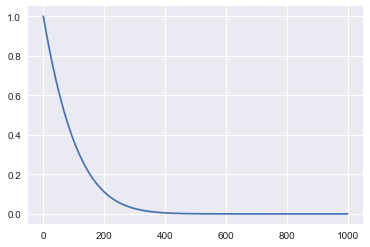

In [212]:
y_axis_test = np.array([test_func(j) for j in x_axis])
plt.plot(x_axis, y_axis_test)

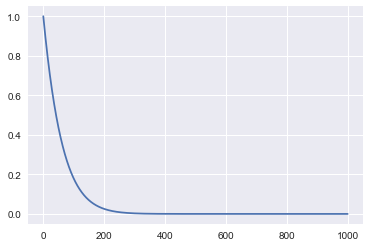

In [190]:
y_axis_v = np.array([sf_after_t(rv,2000,2000+i)**4 for i in x_axis])
plt.plot(x_axis, y_axis_v)

In [196]:
confidence = 0.6
padding = (1-confidence)/2
print(confidence+padding, padding)

0.8 0.2


In [210]:
def find_bounds(dist_func, confidence, start):
    padding = (1-confidence)/2
    left = sp.optimize.newton(lambda x: dist_func(x)-(confidence+padding), start)
    right = sp.optimize.newton(lambda x: dist_func(x)-(padding), start)
    return left, right

In [216]:
find_bounds(test_func, 0.8, 100)

(11.623763142080241, 208.24160133689483)

### median

In [236]:
sp.optimize.newton(lambda x: test_func(x)-0.5, 100)

71.78061894923361

In [219]:
from skmonaco import mcquad

In [222]:
result, error = mcquad(waiting_dist(rv, 4, cur_state), npoints=100000, xl=[0.], xu=[2000.])

In [229]:
result, error

(93.14052603116578, 0.9537457295521825)

In [226]:
import scipy.integrate as integrate

In [225]:
waiting_dist(rv, 4, cur_state)(200)

0.11145327836703793

### mean

In [241]:
res, err = integrate.quad(waiting_dist(rv, 4, cur_state), 0, 3000)

In [237]:
sp.misc.derivative(waiting_dist(rv, 4, cur_state), 1, dx=1e-6)

-0.008891092029283953

In [239]:
integrate.quad(lambda x: -x*sp.misc.derivative(waiting_dist(rv, 4, cur_state), x, dx=1e-6), 0, 3000)

(94.05086464915901, 1.1708410813695386e-07)

### update current state

In [250]:
cur_state

array([1932.52066465, 1236.58690811, 1565.44826843, 1957.21553757])

In [251]:
step_1_state = cur_state + res

In [252]:
step_1_state

array([2026.57152866, 1330.63777211, 1659.49913244, 2051.26640157])

In [253]:
step_1_state[np.argmax(step_1_state)] = 0
step_1_state

array([2026.57152866, 1330.63777211, 1659.49913244,    0.        ])

In [254]:
step_1_func = waiting_dist(rv, 4, step_1_state)

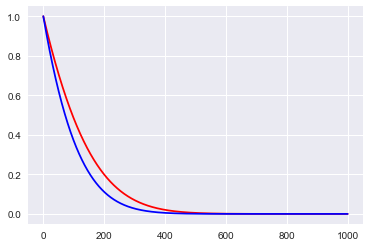

In [256]:
step_1_y = np.array([step_1_func(j) for j in x_axis])
plt.plot(x_axis, step_1_y, color='r')
plt.plot(x_axis, y_axis_test, color='b')

In [257]:
integrate.quad(step_1_func, 0, 3000)

(122.47392716235069, 1.3765485574194136e-11)

In [281]:
import copy

In [297]:
def get_waiting_cdfs(rv, num_table, start_state, num_in_queue):
    current_dining_state = copy.deepcopy(start_state)
    result = []
    result_mean = []
    cur_cdf = 0
    for i in range(num_in_queue):
#         print(current_dining_state)
        cur_cdf = waiting_dist(rv, num_table, current_dining_state)
        cur_mean, cur_error = integrate.quad(cur_cdf, 0, 3500)
        current_dining_state += cur_mean
        current_dining_state[np.argmax(current_dining_state)] = 0
        result.append(cur_cdf)
        result_mean.append(cur_mean)
        print(cur_mean)
    return result, result_mean

In [298]:
get_waiting_cdfs(rv, 4, cur_state, 6)

71.91287729209792
90.78425497098469
121.90151551493204
205.41019966073705
1211.595347703054
226.59953365942928


([<function __main__.waiting_dist.<locals>.<lambda>(x)>,
  <function __main__.waiting_dist.<locals>.<lambda>(x)>,
  <function __main__.waiting_dist.<locals>.<lambda>(x)>,
  <function __main__.waiting_dist.<locals>.<lambda>(x)>,
  <function __main__.waiting_dist.<locals>.<lambda>(x)>,
  <function __main__.waiting_dist.<locals>.<lambda>(x)>],
 [71.91287729209792,
  90.78425497098469,
  121.90151551493204,
  205.41019966073705,
  1211.595347703054,
  226.59953365942928])

In [283]:
cur_state = current_state(rv, num_table)
cur_state

array([2017.72038314, 1883.77589158, 1804.09416445, 1690.85614503])

In [286]:
cur_state

array([2017.72038314, 1883.77589158, 1804.09416445, 1690.85614503])

In [301]:
test_cdf, test_mean = get_waiting_cdfs(rv, 4, cur_state, 10)

71.91287729209792
90.78425497098469
121.90151551493204
205.41019966073705
1211.595347703054
226.59953365942928
220.5138956468784
300.28080108030895
958.9935339253745
298.77450403410296


In [302]:
test_mean

[71.91287729209792,
 90.78425497098469,
 121.90151551493204,
 205.41019966073705,
 1211.595347703054,
 226.59953365942928,
 220.5138956468784,
 300.28080108030895,
 958.9935339253745,
 298.77450403410296]

In [303]:
np.cumsum(test_mean)

array([  71.91287729,  162.69713226,  284.59864778,  490.00884744,
       1701.60419514, 1928.2037288 , 2148.71762445, 2448.99842553,
       3407.99195945, 3706.76646349])

In [305]:
verifying = np.array([1690.60570927, 1385.63853963, 1678.13070428, 2154.20508462])
get_waiting_cdfs(rv, 4, verifying, 6)

87.9860294944959
124.81208500939671
154.54721386650792
264.9685060808559
1111.181654284911
246.66895874386915


([<function __main__.waiting_dist.<locals>.<lambda>(x)>,
  <function __main__.waiting_dist.<locals>.<lambda>(x)>,
  <function __main__.waiting_dist.<locals>.<lambda>(x)>,
  <function __main__.waiting_dist.<locals>.<lambda>(x)>,
  <function __main__.waiting_dist.<locals>.<lambda>(x)>,
  <function __main__.waiting_dist.<locals>.<lambda>(x)>],
 [87.9860294944959,
  124.81208500939671,
  154.54721386650792,
  264.9685060808559,
  1111.181654284911,
  246.66895874386915])